In [2]:
import numpy as np
from utils import JPtools as jpt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.cross_validation import train_test_split
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

Using TensorFlow backend.
/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Couldn't import dot_parser, loading of dot files will not be possible.


/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [1]:
## fixed

NETWORK_DIMS = [20, 40, 20, 15, 7, 3]
BATCH_SIZES = [555, 1111, 2222]
#BATCH_SIZES = [555]
MAX_EPOCHS = 5000

In [4]:
## persistent data structures

d = {} # key - number of training samples, 
       # value - tuple of lists. list 1 - number of training epochs. list 2 - avg spatial chi2


In [5]:
%%capture
for bs in BATCH_SIZES:
    current_fine_epoch = 0
    num_epochs = []
    avg_chi2 = []
    
    d[bs] = (num_epochs, avg_chi2)
    
    jae = jpt.JPAutoEncoder(NETWORK_DIMS, init = 'glorot_normal', outer_init = 'positive_uniform', act = 'relu')
    
    X, xc = jpt.manyPsf(samples = 20, batch_size=bs, sigma = 0.1)
    
    X_train, X_val = train_test_split(X, test_size = 0.1, random_state = 42)
    xc_train, xc_val = train_test_split(xc, test_size = 0.1, random_state = 42)
    
    jae.pretrain(X_train, num_epoch = 200)
    

    while current_fine_epoch < MAX_EPOCHS:
        jae.fine_train(X_train, num_epoch = 400)
        current_fine_epoch += 400
        num_epochs.append(current_fine_epoch)
        avg_chi2.append(jae.validation_chi2(X_val))
        
#         jae.predict_and_show(X_val, current_fine_epoch, bs)
#         jae.chi2_plot(xc_val, X_val, current_fine_epoch, bs)
#         jae.chi2_counts_plot(xc_train, current_fine_epoch, bs)
        
        
        
    
    

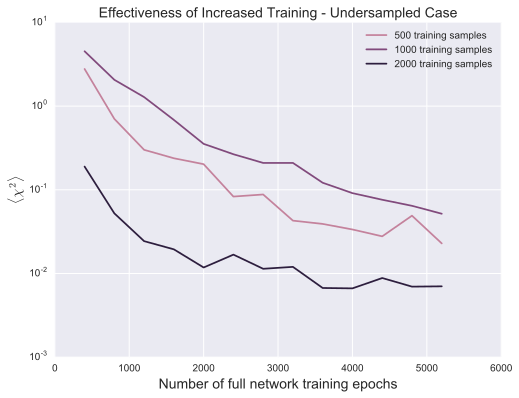

In [7]:
f = plt.figure()
f.set_size_inches(8, 6)
with sns.cubehelix_palette(3, light = 0.6):
    plt.semilogy(d[555][0], d[555][1], alpha = 1, label = '500 training samples')
    plt.semilogy(d[1111][0], d[1111][1], alpha = 1, label = '1000 training samples')
    plt.semilogy(d[2222][0], d[2222][1], alpha = 1, label = '2000 training samples')
    #plt.semilogy(d[4444][0], d[4444][1], alpha = 1, label = '4000 training samples')
plt.ylabel(r'$\langle \chi^2 \rangle$', size = 14)
plt.xlabel('Number of full network training epochs', size = 14)
plt.title('Effectiveness of Increased Training - Undersampled Case', size = 14)
plt.legend(loc = 'upper right')
plt.savefig('trainingBySamples-width-0.5.pdf')

In [3]:
c = {555: ([400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000], [4.2217371742346632, 3.7873099827350791, 2.9881358177311199, 2.001874993866994, 1.3458986626792075, 0.93090643369070014, 0.61932322028882569, 0.4403264096662004, 0.33414448418218684, 0.27215420213411751, 0.23602967449655868, 0.21406678345603658, 0.20028858069013847, 0.19116290141909525, 0.18484239511247874, 0.18037430110241967, 0.17699413907584979, 0.17446224835591112, 0.17242974008433481, 0.17077885190268807]), 2222: ([400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000], [2.8924775275738086, 0.46341374757293941, 0.20485179538703205, 0.13590791140516348, 0.094238729892843764, 0.070755714537594855, 0.0560974718959538, 0.044733180990009273, 0.037164378232290213, 0.032784401170611259, 0.029532132807845571, 0.026937659360291705, 0.024739522693379846, 0.022897810713494407, 0.021296063760898536, 0.019843432358323112, 0.018531958458312146, 0.017316351958358185, 0.016234215711007836, 0.015238478807585176]), 1111: ([400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000], [1.1493411680555852, 0.37420510465113754, 0.2557497951600875, 0.22646537261364336, 0.20923521471553658, 0.19239776670339986, 0.17543178685300628, 0.15664566882276337, 0.13609132551361619, 0.11462176440826573, 0.093723572853356307, 0.075929618585494296, 0.061699279678221523, 0.051054808060170646, 0.043349851792638595, 0.037761591748059389, 0.033742599004239066, 0.030706682030685179, 0.028408419864735912, 0.026501106410993718])}
d = {4444: ([400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000], [0.10916189394482705, 0.063399313795687098, 0.038279884653042925, 0.028002654271736302, 0.023277335034427183, 0.020218061457206147, 0.017970805408139702, 0.016069159707340623, 0.014304664554524477, 0.012652418587068066, 0.011277769740898124, 0.010115018038211394, 0.0091705692171935235, 0.0083798064575805065, 0.0077079932798386182, 0.0071503041065846444, 0.0066902367036674329, 0.0063021730940391067, 0.0059716673049237754, 0.0056874530807184704])}

In [23]:
print d
print c

{4444: ([400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000], [0.10916189394482705, 0.063399313795687098, 0.038279884653042925, 0.028002654271736302, 0.023277335034427183, 0.020218061457206147, 0.017970805408139702, 0.016069159707340623, 0.014304664554524477, 0.012652418587068066, 0.011277769740898124, 0.010115018038211394, 0.0091705692171935235, 0.0083798064575805065, 0.0077079932798386182, 0.0071503041065846444, 0.0066902367036674329, 0.0063021730940391067, 0.0059716673049237754, 0.0056874530807184704])}
{555: ([400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000], [4.221737174234663, 3.787309982735079, 2.98813581773112, 2.001874993866994, 1.3458986626792075, 0.9309064336907001, 0.6193232202888257, 0.4403264096662004, 0.33414448418218684, 0.2721542021341175, 0.23602967449655868, 0.21406678345603658, 0.20028858069013847, 0.19116290141909525, 0.184842395112

In [3]:
%%capture

X, xc = jpt.manyPsf(samples = 20, batch_size=555)

X_train, X_val = train_test_split(X, test_size = 0.1, random_state = 42)
xc_train, xc_val = train_test_split(xc, test_size = 0.1, random_state = 42)



In [16]:
jae = jpt.JPAutoEncoder(NETWORK_DIMS, act = 'relu', init = 'glorot_normal', outer_init = 'positive_uniform')

In [17]:
%%capture
jae.pretrain(X_train, num_epoch = 200)

In [18]:
%%capture
jae.fine_train(X_train, num_epoch=4800)

In [13]:
X_pred = jae.predict(X_val)

In [14]:
masks = [xc_val > 0.2, xc_val < -0.2]
mask = reduce(np.logical_or, masks)
X_pred_masked = X_pred[mask]
X_val_masked = X_val[mask]

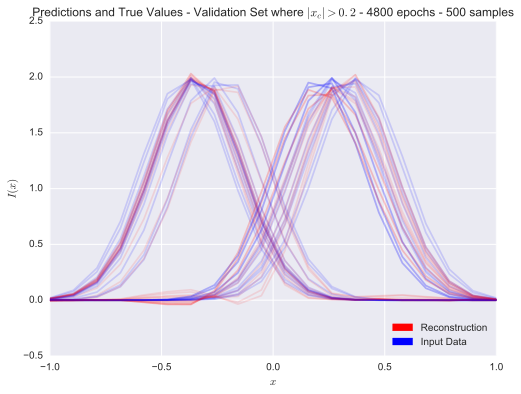

In [15]:
x_range = np.linspace(-1, 1, len(X_pred_masked[0]))
n = len(X_pred_masked[0])
f = plt.figure()
f.set_size_inches(8,6)
for i in range(len(X_pred_masked)):
    plt.plot(x_range, X_val_masked[i], color = 'b', alpha = 0.15)
    plt.plot(x_range, X_pred_masked[i], color = 'r', alpha = 0.11)
    plt.title(r"Predictions and True Values - Validation Set where $|x_c| > 0.2$ - 4800 epochs - 500 samples")
    plt.xlabel(r'$x$')
    plt.ylabel(r'$I(x)$')
    red_patch = mpatches.Patch(color = 'red', label = 'Reconstruction')
    blue_patch = mpatches.Patch(color = 'blue', label = 'Input Data')
    plt.legend(loc='lower right', handles = [red_patch, blue_patch])

#plt.savefig('plots/Reconstruction-Cutout-xc0.2-4800-epochs-500-samples.pdf')
plt.show()


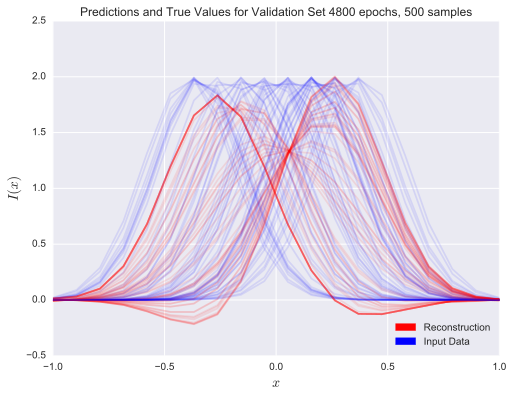

In [19]:
jae.predict_and_show(X_val, 4800, 500, savefig=False)

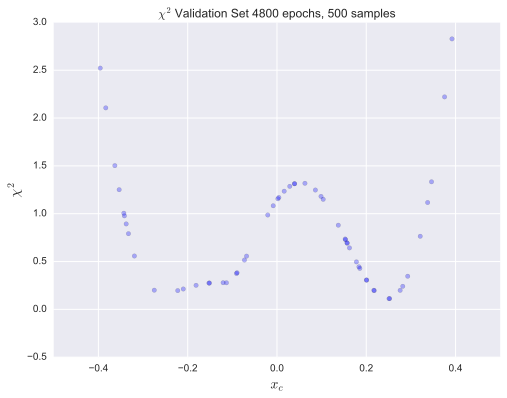

In [20]:
jae.chi2_plot(xc_val, X_val, 4800, 500, savefig=False)

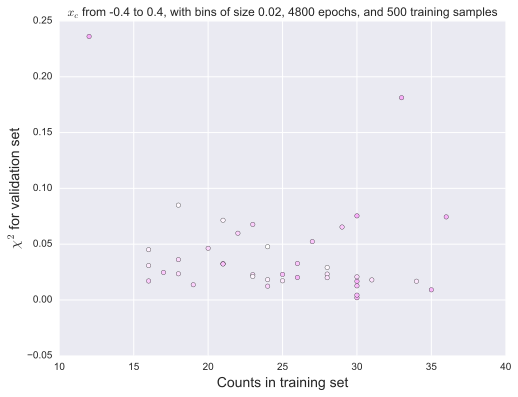

In [11]:
jae.chi2_counts_plot(xc_train, 4800, 500,savefig=True)